In [32]:
modelCols=["credit_level","gender","inet_pd_inst_cnt","star_level",
    "dt_m_1000","dt_m_1003","dt_m_1004","dt_m_1005","dt_m_1006","dt_m_1009","dt_m_1011","dt_m_1012","dt_m_1015","dt_m_1017",
    "dt_m_1027","dt_m_1028","dt_m_1041","dt_m_1044","dt_m_1051","dt_m_1053","dt_m_1067",
    "dt_m_1069","dt_m_1073","dt_m_1074","dt_m_1075","dt_m_1085","dt_m_1086","dt_m_1087","dt_m_1096","dt_m_1099","dt_m_1102",
    "dt_m_1105","dt_m_1108","dt_m_1111","dt_m_1594","dt_m_1601","dt_m_1617","dt_m_1618","dt_m_1620","dt_m_1630","dt_m_1633",
    "last_year_capture_user_flag","app1_visits","app2_visits","app3_visits","app4_visits","app5_visits","app6_visits",
    "app7_visits","app8_visits","access_net_dur","tmlRegister_net_dur","prdOpen_dur","tmlRegister_dur","prdOpen_net_dur",
    "brand","product","cust_point_level","age","market_price_level","app_cnt",
    "dt_m_1027_type","dt_m_1075_type","dt_m_1086_type","dt_m_1087_type",
    "dt_m_1102_type","dt_m_1108_type","dt_m_1594_type","dt_m_1617_type",
    "dt_m_1630_type","dt_m_1633_type","app1_visits_type","app2_visits_type","app3_visits_type",
    "app4_visits_type","app5_visits_type","app6_visits_type","app7_visits_type",
    "dt_m_1087_pref","in_10s_per","in_10_30s_per","in_30_60s_per","out_60s_per","dt_m_1035_pref","dt_m_1043","dt_m_1052",
    "zjdur_per_times","bjdur_per_times","zjdur_perc","bjdur_perc","zjdur_per_man","zjman_perc","zjman_per_recent3","dt_m_1085_bj",
    "dt_m_1086_bj","dt_m_1087_bj","dt_m_1099_perc","dt_m_1105_perc","zjctdur_per_times","bjctdur_per_times","market_price_per_mon",
    "ctdur_per_times","zjctdur_perc","total_message","message_send_perc","zjtimes_per_day","bjtimes_per_day","zjdur_mean_vs_max",
    "bjdur_mean_vs_max","current_month_man_perc","zj_current_month_man_perc","dt_m_1034","dt_m_1035",'liuliang_per_dur',
    'app_pref','netdur_per_appvisit','netflow_per_appvisit','flowmean_per_prod','zjdurmean_per_prod','zjdur_per_prodcnt',
    'bjdur_per_prodcnt','flow_per_prodcnt','message_per_prodcnt','rest_zj_perc','zjman_per_day','zjtime_per_man','bjtimes_per_man','bjdur_per_man',
    'zjdur_per_man_perc','zjtimes_per_man_perc','bj_man','bj_man_perc','zj_bj_man','app_visits_std']

In [33]:
len(modelCols)

134

In [31]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics.classification import f1_score
from xgboost import plot_importance
from matplotlib import pyplot

In [34]:
data=pd.read_csv("E:\zte\data\data_v5.csv")
data['bjtimes_per_man']=data['calltime_per_man']-data['zjtime_per_man']
data['bjdur_per_man']=data['calldur_per_man']-data['zjdur_per_man']
data['zjdur_per_man_perc']=data['zjdur_per_man']/data['calldur_per_man']
data['zjtimes_per_man_perc']=data['zjtime_per_man']/data['calltime_per_man']
data['bj_man']=data['dt_m_1015']/data['bjdur_per_man'].replace(0, np.inf) 
data['bj_man_perc']=data['bj_man']/data['dt_m_1041'].replace(0, np.inf) 
data['zj_bj_man']=data['bj_man']+data['dt_m_1051']-data['dt_m_1041']

In [5]:
data["binLabel"]=data["label"].apply(lambda x: 0 if x=="7C26FADD409BD4B9" else 1)
data.head()

,user,credit_level,membership_level,gender,cust_point,inet_pd_inst_cnt,star_level,market_price,dt_m_1000,dt_m_1003,...,dt_m_1087_bj_times,dt_m_1085_bj,dt_m_1086_bj,dt_m_1087_bj,dt_m_1099_perc,dt_m_1105_perc,zjctdur_per_times,bjctdur_per_times,my_vs_ctzj,binLabel
0,test_10047,NaN,9999.0,1.0,1403.0,11.0,1500.0,1698.0,523,78405,...,4,0.785965,0.200000,0.014035,0.043148,0.777712,125.285714,150.400000,0,1
1,test_106,100100.0,9999.0,1.0,5738.0,5.0,1300.0,NaN,49,1341,...,0,0.950000,0.050000,0.000000,0.214019,1.000000,47.833333,0.000000,0,1
2,test_10733,999999.0,9999.0,2.0,1010.0,5.0,1200.0,2199.0,112,4661,...,6,0.562500,0.343750,0.093750,0.039262,1.000000,183.000000,0.000000,2,1
3,test_10935,100100.0,9999.0,NaN,11952.0,1.0,1400.0,3299.0,349,49571,...,1,0.868852,0.122951,0.008197,0.615642,0.635166,201.916667,179.580645,2,1
4,test_11016,999999.0,9999.0,2.0,9638.0,5.0,1400.0,1799.0,49,2082,...,0,0.900000,0.100000,0.000000,0.923631,0.517421,47.380952,46.400000,0,1


In [35]:
lb=LabelEncoder()
data['app_pref']=data['app_pref'].fillna("app0_visits")
for col in ["brand","product",'app_pref']:
    data[col]=lb.fit_transform(data[col])

In [36]:
submitData=data[data["label"].isnull()]
submitData["user"].count()

79407

In [37]:
trainData=data[~data["label"].isnull()]
trainData["user"].count()

322757

In [38]:
trainData["label_index"]=lb.fit_transform(trainData["label"])
# X=trainData[modelCols]
y=trainData["label_index"]

D:\Users\fjc-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
# train_x, test_x, train_y, test_y=train_test_split(X,y,random_state=0)
# dtrain=xgb.DMatrix(train_x,label=train_y,missing=np.NaN)
# dtest=xgb.DMatrix(test_x,missing=np.NaN)
train_x_all, test_x_all, train_y_all, test_y=train_test_split(trainData,y,random_state=0)

m=train_x_all[train_x_all["label"]=='7C26FADD409BD4B9']
n=train_x_all[train_x_all["label"]!='7C26FADD409BD4B9']
sample=m.sample(50000,random_state=963741)
train=n.append(sample)
train_x=train[modelCols]
train_y=train["label_index"]
test_x=test_x_all[modelCols]

In [10]:
#全部数据训练
train_x_all, test_x_all, train_y_all, test_y=train_test_split(trainData,y,random_state=0)
train_x=train_x_all[modelCols]
train_y=train_x_all["label_index"]
test_x=test_x_all[modelCols]

In [40]:
xlf = xgb.XGBClassifier(booster="gbtree",
                        objective="multi:softmax",
                        num_class=5,
                        eval_metric="mlogloss",
                        n_estimators=150,
                        max_depth=9,
                        reg_alpha=0,
                        reg_lambda=1,
                        subsample=0.6,
                        colsample_bytree=0.3,
                        learning_rate=0.1,
                        n_jobs=10,
                        grow_policy="lossguide"
                        )

In [41]:
xgbModel=xlf.fit(train_x,train_y)

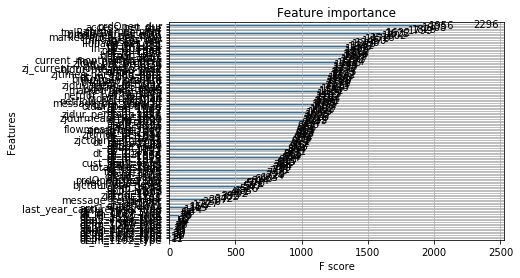

In [42]:
plot_importance(xgbModel)
pyplot.show()

In [43]:
y_pred = xgbModel.predict(test_x)
macro_f1=f1_score(test_y,y_pred,average='macro')
print(macro_f1)

0.8881616150423302


In [14]:
pd.crosstab(test_y,y_pred)

col_0,0,1,2,3,4
label_index,,,,,
0,1934,7,386,279,1
1,3,1991,86,104,26
2,29,57,70384,186,36
3,96,51,280,4110,4
4,0,4,120,7,509


In [44]:
pd.crosstab(test_y,y_pred)

col_0,0,1,2,3,4
label_index,,,,,
0,1967,7,332,301,0
1,4,2023,52,101,30
2,88,138,70011,337,118
3,110,64,187,4171,9
4,0,5,54,10,571


In [45]:
submit_pred=xgbModel.predict(submitData[modelCols])
submitData["pred_label"]=lb.inverse_transform(submit_pred)

D:\Users\fjc-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
submitData.groupby("pred_label")["user"].count()

pred_label
0F2E4CC10EDBE80F     1132
56AFA2A526F96CC9     2400
7C26FADD409BD4B9    70531
816A9BEBED2D7C99     4572
C7E2941B65C6CCD6      772
Name: user, dtype: int64

In [47]:
submitData[["user","pred_label"]].to_csv("E:\zte\data\chongqin_xgb_2.csv",index=False,header=False)

In [28]:
lb.inverse_transform([0,1,2,3,4])

array(['0F2E4CC10EDBE80F', '56AFA2A526F96CC9', '7C26FADD409BD4B9',
       '816A9BEBED2D7C99', 'C7E2941B65C6CCD6'], dtype=object)

In [48]:
for x,y in zip(modelCols,xlf.feature_importances_):
    print(x,y)

credit_level 0.0030173918
gender 0.0024638467
inet_pd_inst_cnt 0.001968448
star_level 0.0086627565
dt_m_1000 0.0130400285
dt_m_1003 0.0027588282
dt_m_1004 0.0025529298
dt_m_1005 0.0040986435
dt_m_1006 0.021582011
dt_m_1009 0.0038675775
dt_m_1011 0.003381125
dt_m_1012 0.004928548
dt_m_1015 0.0031096477
dt_m_1017 0.0031823593
dt_m_1027 0.0059727966
dt_m_1028 0.007660954
dt_m_1041 0.013048414
dt_m_1044 0.020342795
dt_m_1051 0.018729
dt_m_1053 0.009395628
dt_m_1067 0.05202406
dt_m_1069 0.0036042933
dt_m_1073 0.0067547043
dt_m_1074 0.003000095
dt_m_1075 0.006454053
dt_m_1085 0.002531804
dt_m_1086 0.002642313
dt_m_1087 0.008645683
dt_m_1096 0.0031407035
dt_m_1099 0.004324527
dt_m_1102 0.0037649744
dt_m_1105 0.0038615302
dt_m_1108 0.0025947974
dt_m_1111 0.0024740186
dt_m_1594 0.0052901437
dt_m_1601 0.0042160465
dt_m_1617 0.0050864513
dt_m_1618 0.0026793082
dt_m_1620 0.0027870622
dt_m_1630 0.0037279688
dt_m_1633 0.0024239672
last_year_capture_user_flag 0.003947386
app1_visits 0.031833295
app2_

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42,
                           max_depth=15,
                           n_estimators=300,
                           class_weight="balanced_subsample",
                           max_features="sqrt",
                           n_jobs=10
                           )

In [37]:
rfData=train_x_all[modelCols].fillna(0)
rfc_model=rfc.fit(rfData,train_y_all)

In [38]:
rftest=test_x.fillna(0)
rfc_predict_result=rfc.predict(rftest)
rfc_macro_f1=f1_score(test_y,rfc_predict_result,average='macro')
print("随机森林测准确率：",rfc_macro_f1)
rfc_confuse_table=pd.crosstab(test_y,rfc_predict_result)

随机森林测准确率： 0.8707559319971871


In [39]:
rfc_confuse_table

col_0,0,1,2,3,4
label_index,,,,,
0,1880,7,417,302,1
1,3,1948,77,153,29
2,55,88,70079,269,201
3,85,93,298,4058,7
4,0,5,62,4,569


In [10]:
#二分类先识别最多一类
feature=trainData[modelCols]
flag=trainData['binLabel']
train_x_all, test_x_all, train_y_all, test_y=train_test_split(feature,flag,random_state=56873)

In [82]:
xlf_01 = xgb.XGBClassifier(booster="gbtree",
                        objective="binary:logistic",
                        eval_metric="auc",
                        n_estimators=200,
                        max_depth=8,
                        reg_alpha=0,
                        reg_lambda=1,
                        subsample=0.6,
                        colsample_bytree=0.3,
                        learning_rate=0.05,
                        scale_pos_weight=3,
                        n_jobs=10,
                        grow_policy="lossguide"
                        )

In [83]:
xgbModel_01=xlf_01.fit(train_x_all,train_y_all)

In [84]:
y_pred = xgbModel_01.predict(test_x_all)
macro_f1=f1_score(test_y,y_pred)
print(macro_f1)

0.9407459394425506


In [31]:
pd.crosstab(test_y,y_pred)

col_0,0,1
binLabel,,
0,70322,388
1,770,9210


In [85]:
pd.crosstab(test_y,y_pred)

col_0,0,1
binLabel,,
0,70125,585
1,597,9383


In [86]:
submit_pred_01=xgbModel_01.predict(submitData[modelCols])
submitData["pred_label_01"]=submit_pred_01
submitData.groupby("pred_label_01")["user"].count()

D:\Users\fjc-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pred_label_01
0    70564
1     8843
Name: user, dtype: int64

In [87]:
num_3=submitData[submitData['pred_label_01']==0]
num_3['pred']="7C26FADD409BD4B9"
num_3_result=num_3[['user','pred']]
num_3_result['user'].count()

D:\Users\fjc-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


70564

In [53]:
for x,y in zip(modelCols,xlf_01.feature_importances_):
    print(x,y)

credit_level 0.004043095
gender 0.0026771561
inet_pd_inst_cnt 0.002183161
star_level 0.007866723
dt_m_1000 0.020694058
dt_m_1003 0.0024271407
dt_m_1004 0.0021961285
dt_m_1005 0.0028695895
dt_m_1006 0.023964848
dt_m_1009 0.003986756
dt_m_1011 0.005089733
dt_m_1012 0.010712036
dt_m_1015 0.0052083298
dt_m_1017 0.0050893086
dt_m_1027 0.046894297
dt_m_1028 0.008034003
dt_m_1041 0.030828202
dt_m_1044 0.041102514
dt_m_1051 0.13392219
dt_m_1053 0.11696449
dt_m_1067 0.0814627
dt_m_1069 0.010202452
dt_m_1073 0.015838962
dt_m_1074 0.011148368
dt_m_1075 0.02267592
dt_m_1085 0.0097532105
dt_m_1086 0.0025275494
dt_m_1087 0.00924725
dt_m_1096 0.0053342218
dt_m_1099 0.0043272916
dt_m_1102 0.013088277
dt_m_1105 0.0040873084
dt_m_1108 0.0025772157
dt_m_1111 0.0023511755
dt_m_1594 0.0027611721
dt_m_1601 0.006375134
dt_m_1617 0.006410802
dt_m_1618 0.0028791905
dt_m_1620 0.0043270085
dt_m_1630 0.0032256735
dt_m_1633 0.0034819918
last_year_capture_user_flag 0.003962081
app1_visits 0.030313483
app2_visits 0.

In [100]:
otherSampleData=trainData[trainData["label"]!='7C26FADD409BD4B9'].drop("label_index",axis=1)
otherSampleData["label_index"]=lb.fit_transform(otherSampleData["label"])
X=otherSampleData[modelCols]
y=otherSampleData["label_index"]
train_x_other, test_x_other, train_y_other, test_y_other=train_test_split(X,y,random_state=56873)

In [166]:
xlf_02 = xgb.XGBClassifier(booster="gbtree",
                        objective="multi:softmax",
                        eval_metric="map",
                        num_class=4,
                        n_estimators=150,
                        max_depth=7,
                        reg_alpha=0,
                        reg_lambda=1,
                        subsample=0.9,
                        colsample_bytree=0.3,
                        learning_rate=0.1,
                        n_jobs=10,
                        grow_policy="lossguide"
                        )

In [167]:
xgbModel_02=xlf_02.fit(train_x_other,train_y_other)

In [168]:
y_pred_other = xgbModel_02.predict(test_x_other)
macro_f1=f1_score(test_y_other,y_pred_other,average='macro')
print(macro_f1)

0.9173769151940628


In [169]:
pd.crosstab(test_y_other,y_pred_other)

col_0,0,1,2,3
label_index,,,,
0,2351,13,333,5
1,22,1998,167,27
2,208,62,4179,14
3,11,8,9,556


In [176]:
num_other=submitData[submitData['pred_label_01']==1]
submit_pred_02=xgbModel_02.predict(num_other[modelCols])
num_other["pred_label_02"]=lb.inverse_transform(submit_pred_02)
num_other.groupby("pred_label_02")["user"].count()

D:\Users\fjc-pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


pred_label_02
0F2E4CC10EDBE80F    1132
56AFA2A526F96CC9    2307
816A9BEBED2D7C99    4759
C7E2941B65C6CCD6     645
Name: user, dtype: int64

In [177]:
num_other_result=num_other[['user','pred_label_02']]
num_other_result.head()

,user,pred_label_02
20,test_12392,816A9BEBED2D7C99
29,test_14587,816A9BEBED2D7C99
38,test_1621,0F2E4CC10EDBE80F
43,test_17448,816A9BEBED2D7C99
92,test_24702,56AFA2A526F96CC9


In [178]:
num_3_result.head()

,user,pred
0,test_10047,7C26FADD409BD4B9
1,test_106,7C26FADD409BD4B9
2,test_10733,7C26FADD409BD4B9
3,test_10935,7C26FADD409BD4B9
4,test_11016,7C26FADD409BD4B9


In [180]:
num_other_result.to_csv(r"E:\zte\data\num_other_result_0112.csv",index=False,header=False)
num_3_result.to_csv(r"E:\zte\data\num_3_result_0112.csv",index=False,header=False)

In [170]:
for x,y in zip(modelCols,xgbModel_02.feature_importances_):
    print(x,y)

credit_level 0.00513971
gender 0.002629412
inet_pd_inst_cnt 0.002747197
star_level 0.011989916
dt_m_1000 0.027553447
dt_m_1003 0.0053529297
dt_m_1004 0.006872694
dt_m_1005 0.008273842
dt_m_1006 0.027432833
dt_m_1009 0.007021453
dt_m_1011 0.010688735
dt_m_1012 0.029331202
dt_m_1015 0.02574275
dt_m_1017 0.021202948
dt_m_1027 0.005110175
dt_m_1028 0.025130901
dt_m_1041 0.04366638
dt_m_1044 0.012168977
dt_m_1051 0.02720171
dt_m_1053 0.01905783
dt_m_1067 0.009060317
dt_m_1069 0.012379666
dt_m_1073 0.011495113
dt_m_1074 0.004399986
dt_m_1075 0.00913601
dt_m_1085 0.003545707
dt_m_1086 0.005099246
dt_m_1087 0.012382725
dt_m_1096 0.0067855124
dt_m_1099 0.0043298765
dt_m_1102 0.007965735
dt_m_1105 0.0054282886
dt_m_1108 0.0038822948
dt_m_1111 0.0038681196
dt_m_1594 0.009949387
dt_m_1601 0.01149767
dt_m_1617 0.009692132
dt_m_1618 0.0035569428
dt_m_1620 0.0044308715
dt_m_1630 0.008977667
dt_m_1633 0.0033112513
last_year_capture_user_flag 0.004942552
app1_visits 0.048452996
app2_visits 0.01809327
a